# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [ ]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
18848,35,Local-gov,177305,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2377,40,United-States,<=50K
12884,61,State-gov,199495,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18466,64,?,257790,HS-grad,9,Divorced,?,Unmarried,White,Female,0,0,38,United-States,<=50K
21116,34,Private,226296,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,>50K
21694,19,Private,97189,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,22,United-States,<=50K
17430,32,Local-gov,223267,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
20366,40,Private,198873,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,15024,0,30,United-States,>50K
23937,49,Self-emp-not-inc,171540,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
13547,54,Local-gov,185846,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,40,United-States,>50K
30757,31,?,99483,HS-grad,9,Never-married,?,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

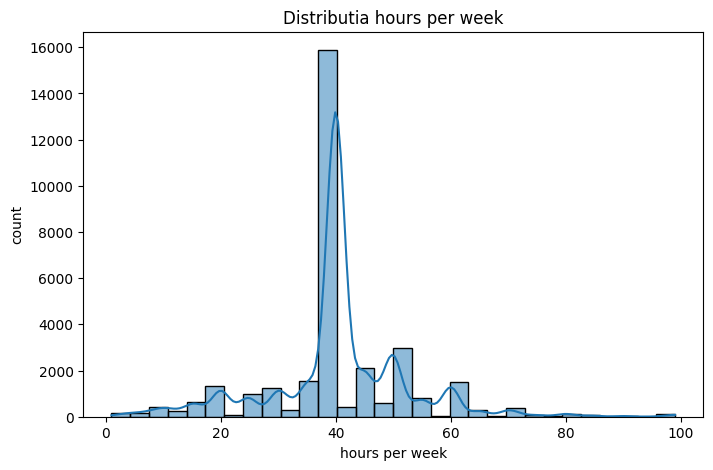

In [6]:
#Analyze hours Target Distribution

plt.figure(figsize=(8, 5))
sns.histplot(data["hours-per-week"], bins=30, kde=True)
plt.title("Distributia hours per week")
plt.xlabel("hours per week")
plt.ylabel("count")
plt.show()

Distributia orelor pe saptamana este asimetrica spre drepta, majoritatea persoanelor lucrand in jur de 40 de ore pe saptamana. Un numar mic de persoane lucreaza semnificativ mai multe ore.

In [7]:
data["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Durata saptamanala a programului de lucru este de aproximativ 40,4 ore cu o medie de 40 de ore, ceea ce indica faptul ca majoritatea persoanelor lucreaza in mod standard, cu norma intreaga. Abaterea standard este de 12.34 ore ceea ce indica o variabilitate moderata a programului de lucru intre pesoane. Valoarea cea mai mica este de 1 ora si cea mai mare de 99 de ore pe saptamana ceea ce indica potential de valori bizare.

In [8]:
#Missing Values

missing_count = data.isnull().sum()
missing_percentage = (missing_count / len(data)) * 100

missing_df = pd.DataFrame({"Valori lipsa":missing_count,"Procent":missing_percentage})
missing_df

,Valori lipsa,Procent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


Analiza arata ca nu avem valori lipsa in setul de date.

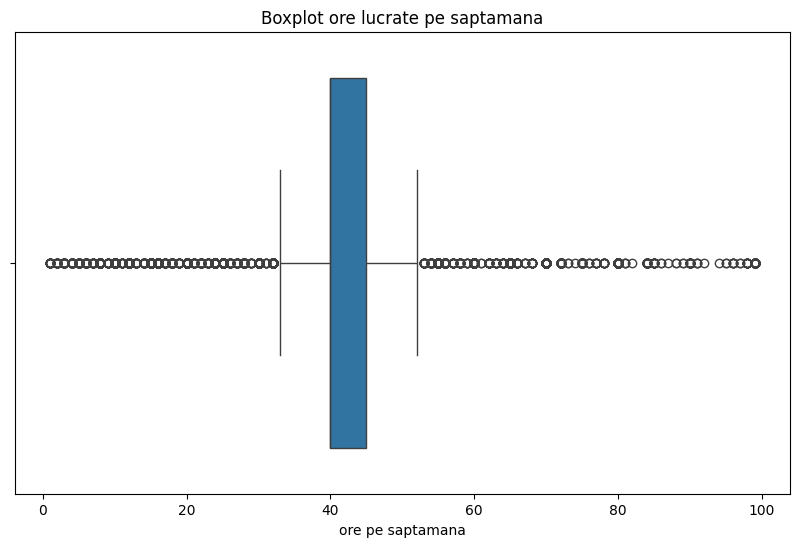

In [10]:
#Identify outliers in at least one numerical column using boxplots. 

plt.figure(figsize=(10, 6))
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot ore lucrate pe saptamana")
plt.xlabel("ore pe saptamana")
plt.show()

Raport EDA

Analiza exploratorie a datelor arata ca distributia orelor de lucru se situeaza in jurul valorii de 40 de ore, cu o asimetrie vizibila spre dreapta si cateva valori extreme. Statistica descriptiva arata o variabilitate a orelor de lucru moderata. Calitatea datelor este buna, deoarece nu avem valori lipsa. Analiza vizuala (boxplot) confirma existenta unor modele extreme de ore de lucru ceea ce semnifica un program de lucru cu semnificativ mai multe sau putine ore pentru anumite persoane.
